In [1]:
import sys
import pathlib
import torch

import numpy as np

# Local
cwd = pathlib.Path().resolve()
src = cwd.parent
root = src.parent
sys.path.append(str(src))

from utils.watertopo import WaterTopo
from models.unet import UNet
from utils.plot import compare_simulations_slider
from utils.utils import recursive_pred

%matplotlib inline
%matplotlib ipympl
# %matplotlib widget

In [2]:
#initialize GPU -  In case of windows use cuda instead of nps
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Is CUDA enabled?",torch.cuda.is_available())
print("Number of GPUs",torch.cuda.device_count())
print('Using device:', device)

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Is CUDA enabled? False
Number of GPUs 0
Using device: cpu


In [3]:
grid_size = 64

### Compare models with different step sizes with hidden channels [32, 64]

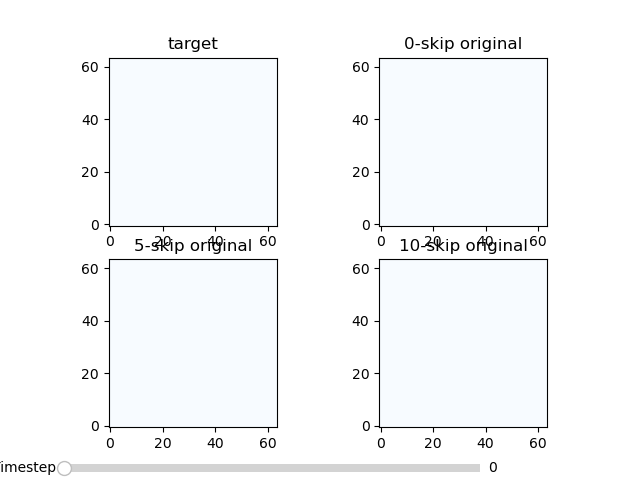

In [7]:
# Load in the models
save_path = "../results/trained_models/unet/"
unet1 = UNet(2, [32,64], 1)
unet1.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip0", map_location="cpu"))
unet1.eval()

unet2 = UNet(2, [32,64], 1)
unet2.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip5", map_location="cpu"))
unet2.eval()

unet3= UNet(2, [32,64], 1)
unet3.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip10", map_location="cpu"))
unet3.eval()

models = [unet1, unet2, unet3]

skips = [0, 5, 10]
labels = ["target", "0-skip original", "5-skip original", "10-skip original"]

sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test1", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    shortest_wd = np.inf

    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = recursive_pred(models[i], X, sim_skips.wd.shape[0]-1, include_first_timestep=True)
        wds.append(outputs.detach().numpy())

    slider1 = compare_simulations_slider(wds, labels)

### With augmented data

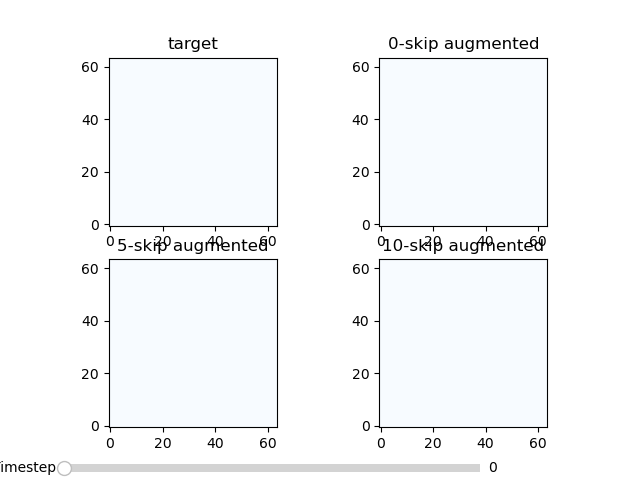

In [11]:
# Load in the models
save_path = "../results/trained_models/unet/"
unet1 = UNet(2, [32,64], 1)
unet1.load_state_dict(torch.load(save_path + "unet_32_64_aug_data400_skip0", map_location="cpu"))
unet1.eval()

unet2 = UNet(2, [32,64], 1)
unet2.load_state_dict(torch.load(save_path + "unet_32_64_aug_data80_skip5", map_location="cpu"))
unet2.eval()

unet3= UNet(2, [32,64], 1)
unet3.load_state_dict(torch.load(save_path + "unet_32_64_aug_data80_skip10", map_location="cpu"))
unet3.eval()

models = [unet1, unet2, unet3]

skips = [0, 5, 10]
labels = ["target", "0-skip augmented", "5-skip augmented", "10-skip augmented"]

sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test2", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    shortest_wd = np.inf

    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = recursive_pred(models[i], X, sim_skips.wd.shape[0]-1, include_first_timestep=True)
        wds.append(outputs.detach().numpy())

    slider2 = compare_simulations_slider(wds, labels)

### Compare models with different step sizes with hidden channels [32, 64, 128]

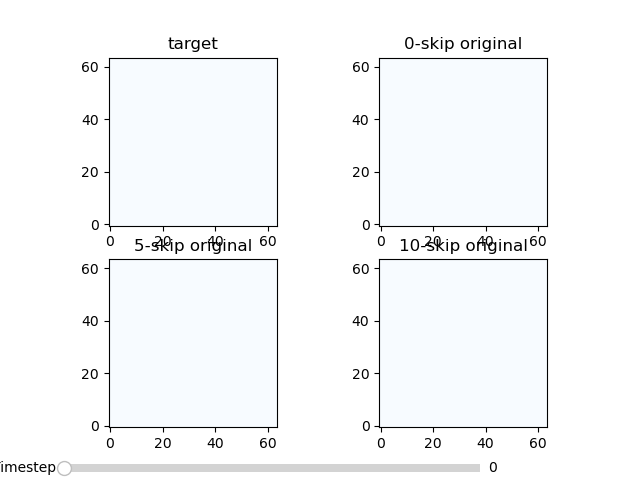

In [13]:
# Load in the models
save_path = "../results/trained_models/unet/"
unet1 = UNet(2, [32,64, 128], 1)
unet1.load_state_dict(torch.load(save_path + "unet_32_64_128_orig_data80_skip0", map_location="cpu"))
unet1.eval()

unet2 = UNet(2, [32,64,128], 1)
unet2.load_state_dict(torch.load(save_path + "unet_32_64_128_orig_data80_skip5", map_location="cpu"))
unet2.eval()

unet3= UNet(2, [32,64,128], 1)
unet3.load_state_dict(torch.load(save_path + "unet_32_64_128_orig_data80_skip10", map_location="cpu"))
unet3.eval()

models = [unet1, unet2, unet3]

skips = [0, 5, 10]
labels = ["target", "0-skip original", "5-skip original", "10-skip original"]

sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test1", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = recursive_pred(models[i], X, sim_skips.wd.shape[0]-1, include_first_timestep=True)
        wds.append(outputs.detach().numpy())

    slider3 = compare_simulations_slider(wds, labels)